# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='tides_river_rain'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
date,date,date
discharge_rate,number,"Discharge rate, in cubic feet per second, for the San Diego River at Fashion Valley"
recent_total_discharge,number,Rolling three day sum of discharge_rate
recent_max_discharge,number,Rolling three day max of discharge_rate
dailyprecip,string,"Daily precipitation, in inches, at Lindberg Field"
recent_precip,number,Rolling three day sum of dailyprecip
wl_max,string,"Max ocean water level, in feet, at La Jolla"
wl_min,string,"Min water level, in feet, at La Jolla"


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,date,discharge_rate,recent_total_discharge,recent_max_discharge,dailyprecip,recent_precip,wl_max,wl_min
0,1988-01-01,22.0,22.0,22.0,NaN,NaN,NaN,NaN
1,1988-01-02,20.0,42.0,42.0,NaN,NaN,NaN,NaN
2,1988-01-03,18.0,60.0,60.0,NaN,NaN,NaN,NaN
3,1988-01-04,18.0,56.0,60.0,NaN,NaN,NaN,NaN
4,1988-01-05,21.0,57.0,60.0,NaN,NaN,NaN,NaN


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,0
datetime,1
number,7
other,0


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 1 columns):
date    11171 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 87.4 KB


None

,count,unique,top,freq,first,last
date,11171,11171,1989-12-27 00:00:00,1,1988-01-01 00:00:00,2018-08-01 00:00:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 7 columns):
discharge_rate            11171 non-null float64
recent_total_discharge    11171 non-null float64
recent_max_discharge      11171 non-null float64
dailyprecip               3626 non-null float64
recent_precip             3628 non-null float64
wl_max                    5877 non-null float64
wl_min                    5874 non-null float64
dtypes: float64(7)
memory usage: 611.0 KB


None

,count,mean,std,min,25%,50%,75%,max
discharge_rate,11171.0,33.040670,155.871812,0.000,1.760,5.450,16.00000,5800.000
recent_total_discharge,11171.0,99.121869,386.138083,0.000,5.310,17.030,51.45000,9260.000
recent_max_discharge,11171.0,133.853686,497.145333,0.000,5.610,18.600,64.00000,9260.000
dailyprecip,3626.0,0.024589,0.138527,0.000,0.000,0.000,0.00000,2.700
recent_precip,3628.0,0.073727,0.280030,-0.000,0.000,0.000,0.00000,4.080
wl_max,5877.0,5.460670,0.760847,3.360,4.902,5.453,5.98800,7.812
wl_min,5874.0,1.926291,0.698517,-1.148,1.484,1.999,2.42125,3.885


In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


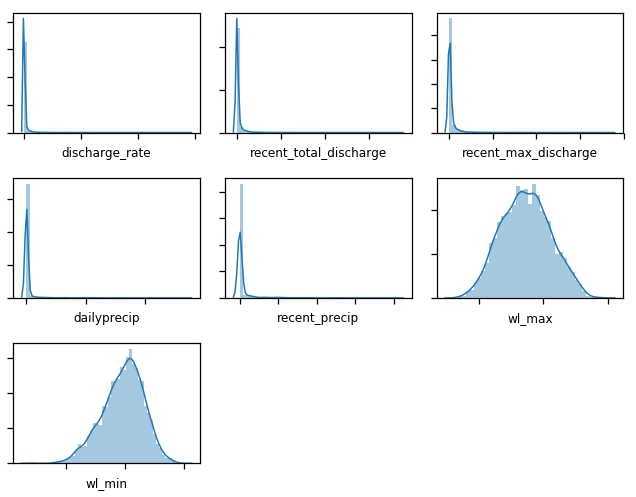

In [14]:
plot_histograms(df[number_col_names])

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
            #g.set(xticklabels=[])
            #g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
  

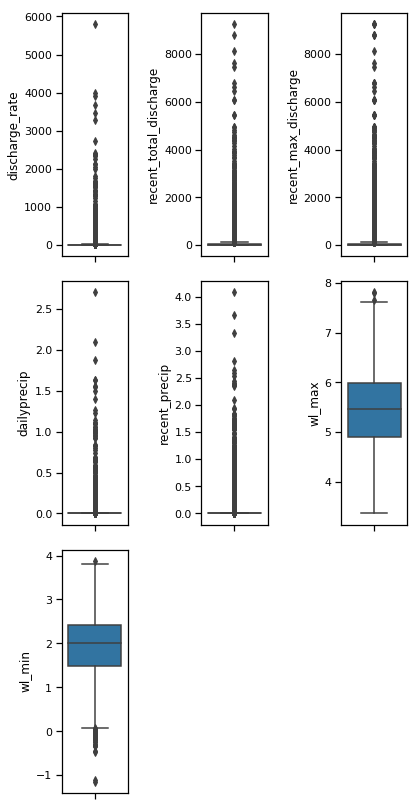

In [16]:
  
plot_boxes(df[number_col_names])

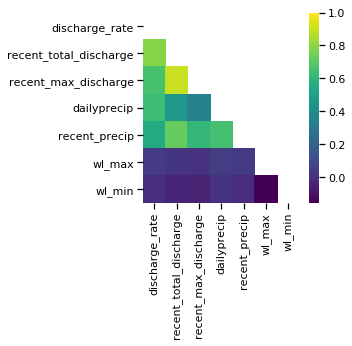

In [17]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

In [18]:
df.dailyprecip.corr(df.discharge_rate)

0.6370357153524047

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

# Nulls

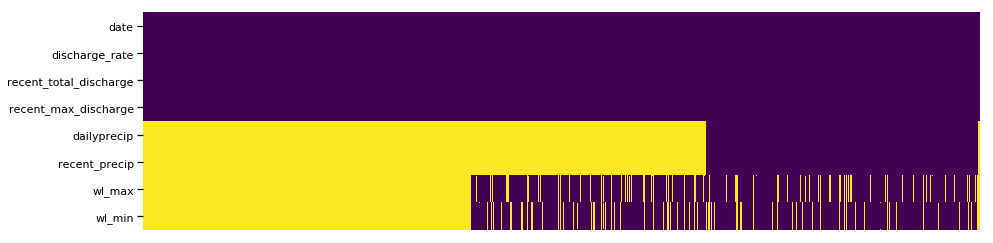

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )